In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
#This dataset came with the values as headers. header = None fixed this.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/haggarw3/mid-bootcamp-project-details/main/classification/creditcardmarketing.csv', header = None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18000 non-null  int64  
 1   1       18000 non-null  object 
 2   2       18000 non-null  object 
 3   3       18000 non-null  object 
 4   4       18000 non-null  object 
 5   5       18000 non-null  int64  
 6   6       18000 non-null  object 
 7   7       18000 non-null  object 
 8   8       18000 non-null  int64  
 9   9       18000 non-null  int64  
 10  10      18000 non-null  int64  
 11  11      18000 non-null  object 
 12  12      17976 non-null  float64
 13  13      17976 non-null  float64
 14  14      17976 non-null  float64
 15  15      17976 non-null  float64
 16  16      17976 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage: 2.3+ MB


In [8]:
data.shape

(18000, 17)

In [9]:
#drop unrelated column

In [10]:
data.drop([2], axis=1, inplace=True)

In [11]:
#Rename columns with correct headers

In [12]:
data.columns = ['Customer Number', 'Offer Accepted', 'Mailer Type', 'Income Level', '#Bank Accounts Open','Overdraft Protection', 'Credit Rating', '#Credit Cards Held', '#Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'BalanceQ1', 'BalanceQ2', 'BalanceQ3', 'BalanceQ4']

In [13]:
data.head()

,Customer Number,Offer Accepted,Mailer Type,Income Level,#Bank Accounts Open,Overdraft Protection,Credit Rating,#Credit Cards Held,#Homes Owned,Household Size,Own Your Home,Average Balance,BalanceQ1,BalanceQ2,BalanceQ3,BalanceQ4
0,1,No,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [14]:
#start to explore the actual data

In [15]:
data.describe()

,Customer Number,#Bank Accounts Open,#Credit Cards Held,#Homes Owned,Household Size,Average Balance,BalanceQ1,BalanceQ2,BalanceQ3,BalanceQ4
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [16]:
data.isnull().sum()

Customer Number          0
Offer Accepted           0
Mailer Type              0
Income Level             0
#Bank Accounts Open      0
Overdraft Protection     0
Credit Rating            0
#Credit Cards Held       0
#Homes Owned             0
Household Size           0
Own Your Home            0
Average Balance         24
BalanceQ1               24
BalanceQ2               24
BalanceQ3               24
BalanceQ4               24
dtype: int64

In [17]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Mailer Type              object
Income Level             object
#Bank Accounts Open       int64
Overdraft Protection     object
Credit Rating            object
#Credit Cards Held        int64
#Homes Owned              int64
Household Size            int64
Own Your Home            object
Average Balance         float64
BalanceQ1               float64
BalanceQ2               float64
BalanceQ3               float64
BalanceQ4               float64
dtype: object

In [18]:
#Very little distribution of NULLS, dropped all nulls

In [19]:
data=data.dropna()

In [20]:
#starting to visualize the data and getting familiar with each columns and their values

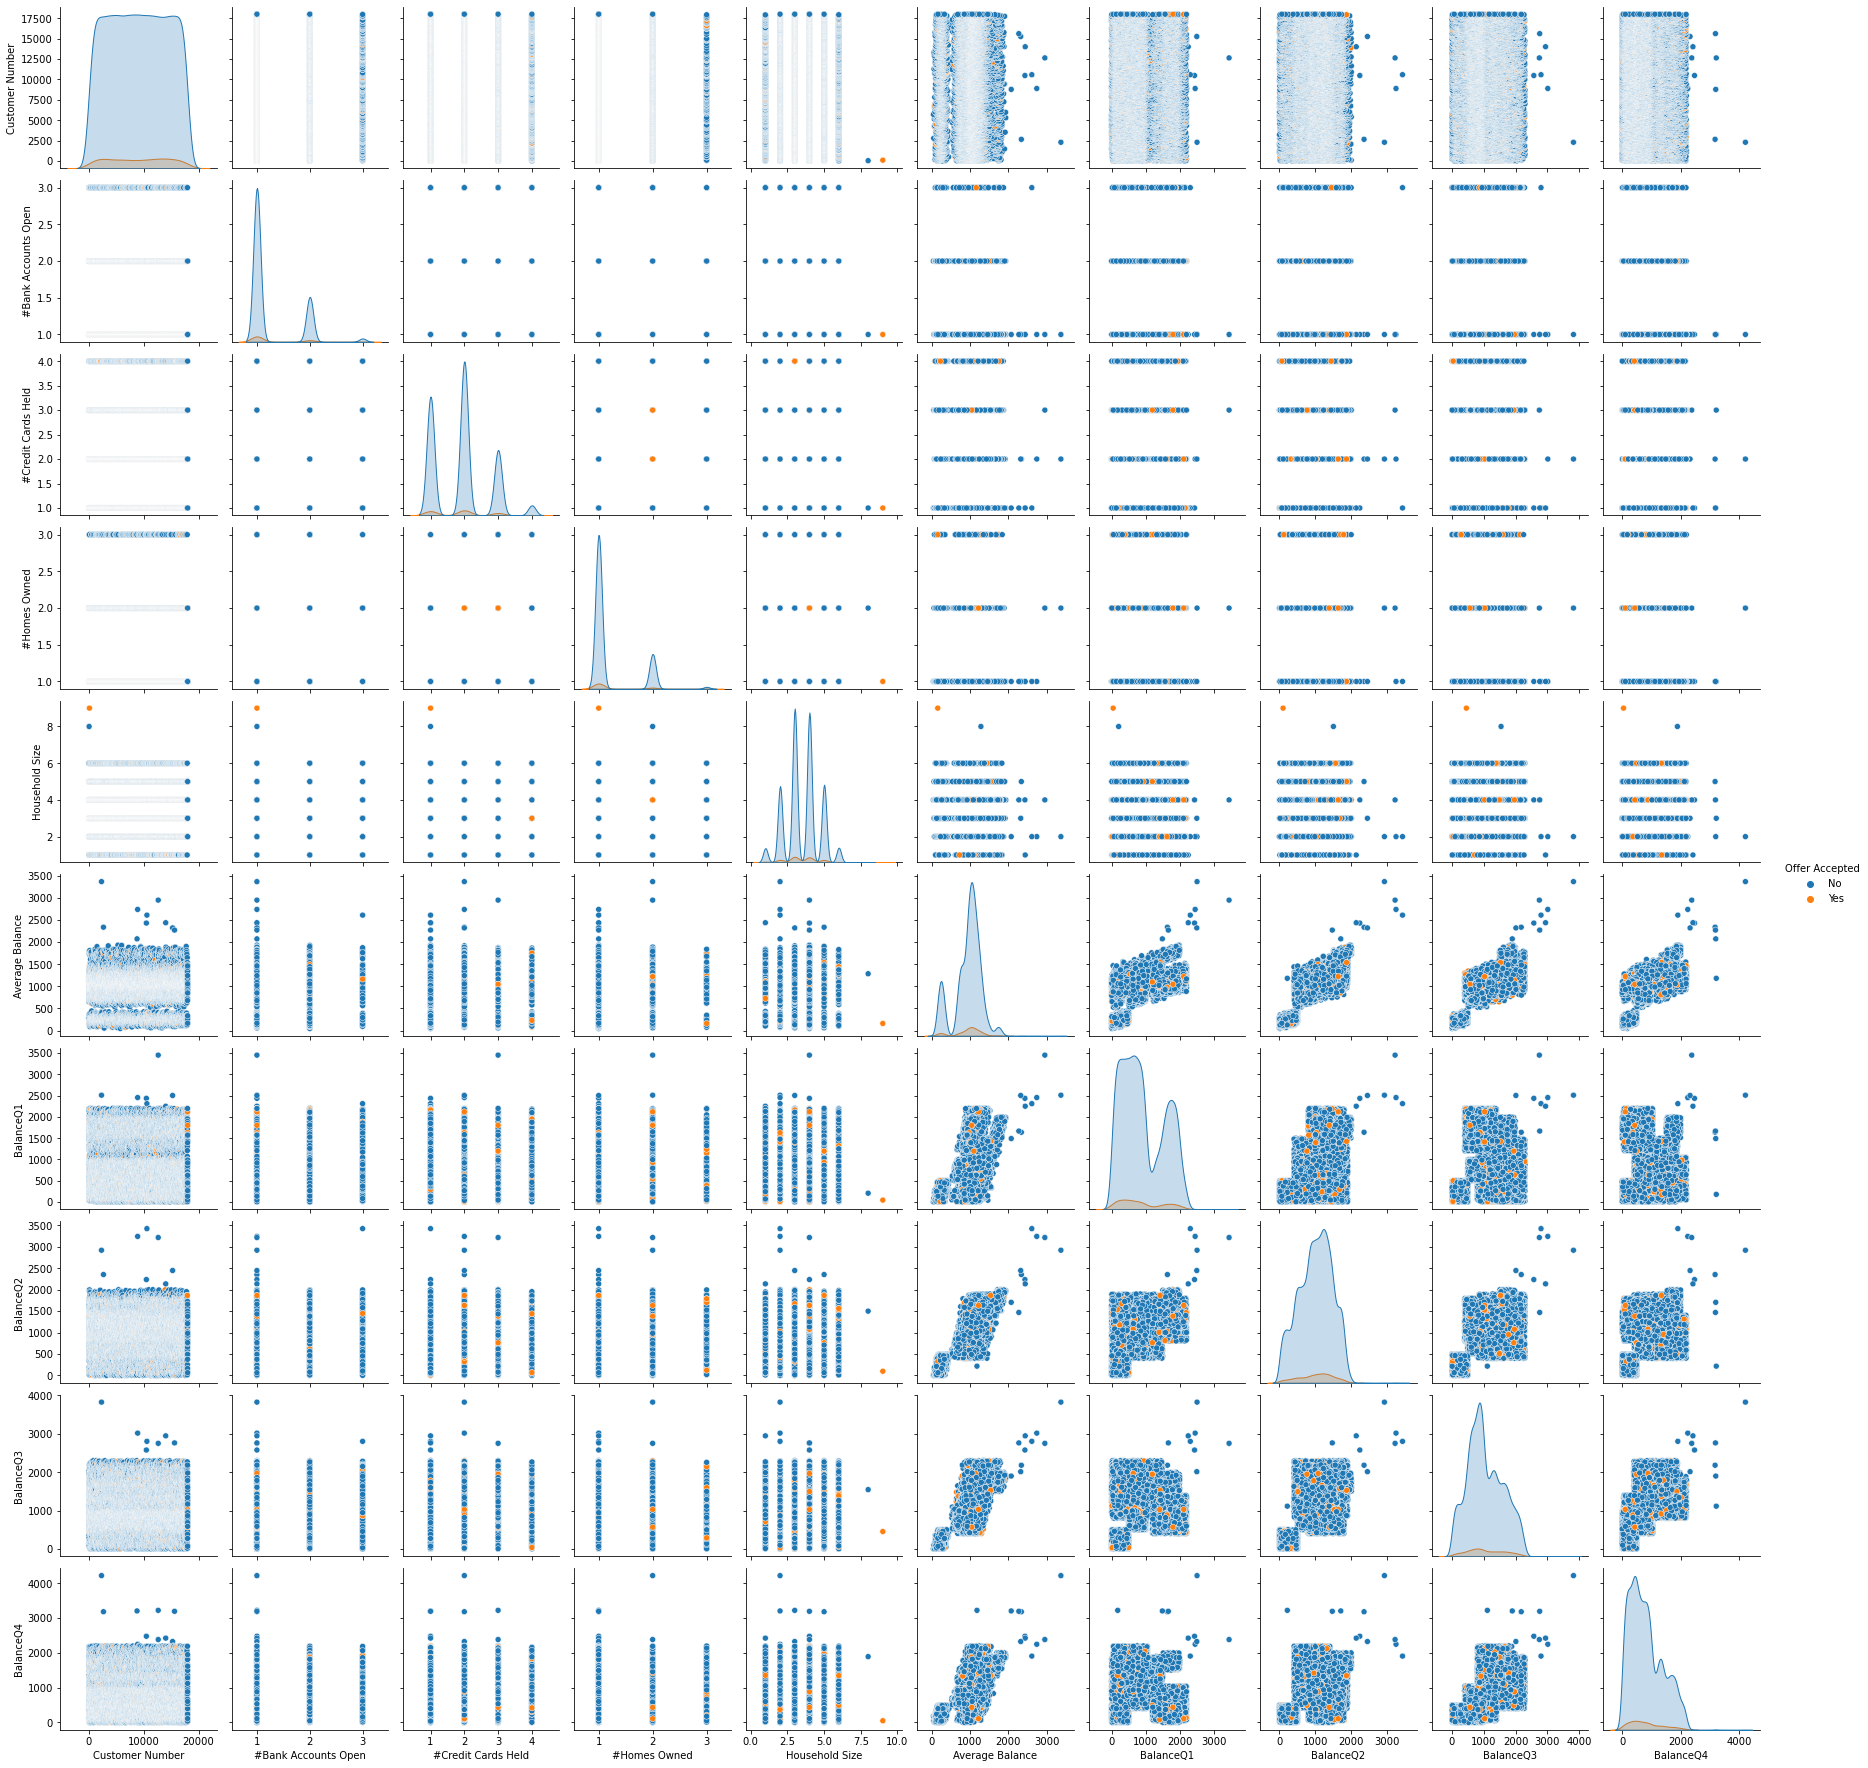

In [14]:
sns.pairplot(data, hue='Offer Accepted')

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

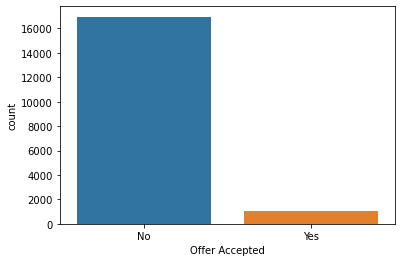

In [21]:
sns.countplot(x='Offer Accepted', data=data)

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

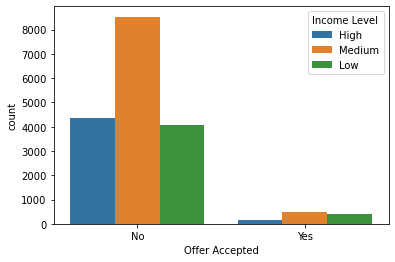

In [22]:
sns.countplot(x='Offer Accepted', data=data, hue='Income Level')

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

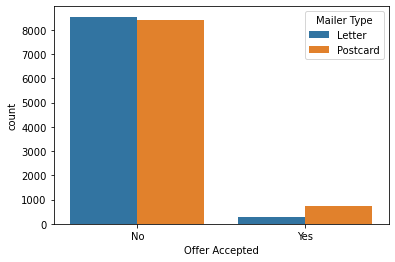

In [23]:
sns.countplot(x='Offer Accepted', data=data, hue='Mailer Type')

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

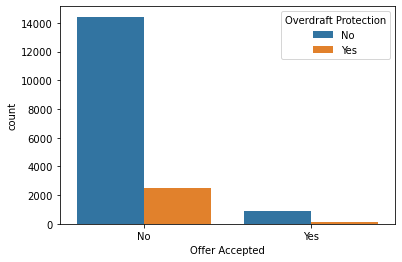

In [24]:
sns.countplot(x='Offer Accepted', data=data, hue='Overdraft Protection')

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

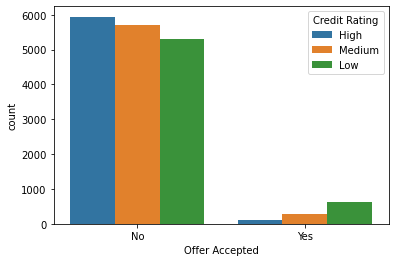

In [25]:
sns.countplot(x='Offer Accepted', data=data, hue='Credit Rating')

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

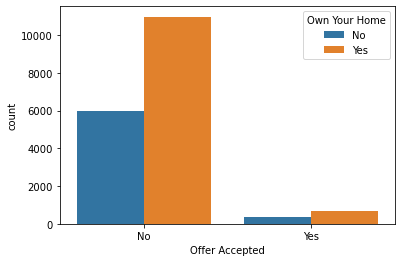

In [26]:
sns.countplot(x='Offer Accepted', data=data, hue='Own Your Home')

In [27]:
data['Own Your Home'].value_counts()

Yes    11636
No      6340
Name: Own Your Home, dtype: int64

In [28]:
data.isnull().sum()

Customer Number         0
Offer Accepted          0
Mailer Type             0
Income Level            0
#Bank Accounts Open     0
Overdraft Protection    0
Credit Rating           0
#Credit Cards Held      0
#Homes Owned            0
Household Size          0
Own Your Home           0
Average Balance         0
BalanceQ1               0
BalanceQ2               0
BalanceQ3               0
BalanceQ4               0
dtype: int64

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='#Credit Cards Held', ylabel='Density'>

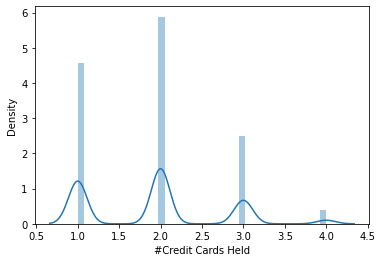

In [29]:
sns.distplot(data['#Credit Cards Held'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Balance', ylabel='Density'>

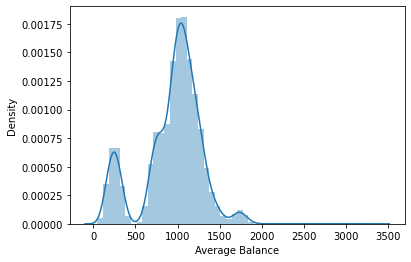

In [30]:
sns.distplot(data['Average Balance'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Household Size', ylabel='Density'>

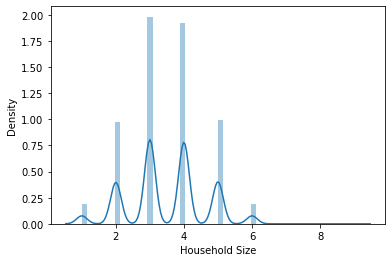

In [31]:
sns.distplot(data['Household Size'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='#Homes Owned', ylabel='Density'>

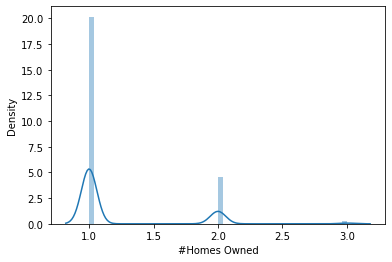

In [32]:
sns.distplot(data['#Homes Owned'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='#Credit Cards Held', ylabel='Density'>

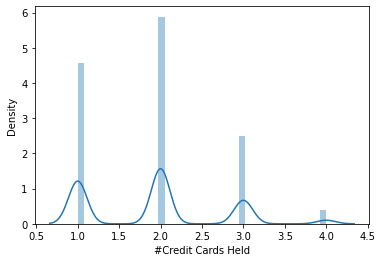

In [33]:
sns.distplot(data['#Credit Cards Held'])

<AxesSubplot:xlabel='Offer Accepted', ylabel='Average Balance'>

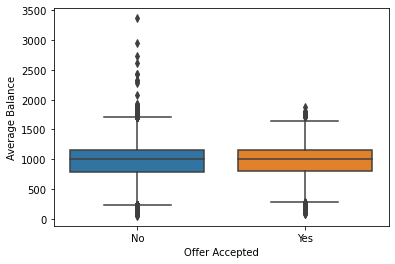

In [34]:
sns.boxplot(x='Offer Accepted', y='Average Balance', data=data)

In [35]:
data['Offer Accepted'].value_counts()

No     16955
Yes     1021
Name: Offer Accepted, dtype: int64

In [36]:
#split the features and target

In [37]:
x=data.drop(['Offer Accepted', 'Customer Number', 'BalanceQ1', 'BalanceQ2', 'BalanceQ3', 'BalanceQ4'], axis = 1)
y=data['Offer Accepted']

In [38]:
x.head()

,Mailer Type,Income Level,#Bank Accounts Open,Overdraft Protection,Credit Rating,#Credit Cards Held,#Homes Owned,Household Size,Own Your Home,Average Balance
0,Letter,High,1,No,High,2,1,4,No,1160.75
1,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00


In [39]:
#split the features into categoricals and numericals

In [40]:
numericals=x[['#Bank Accounts Open', '#Credit Cards Held', '#Homes Owned', 'Household Size', 'Average Balance']]

In [41]:
categoricals=x[['Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']]

In [42]:
#scale numerical features

In [43]:
scaled = Normalizer().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [44]:
scaled

,0,1,2,3,4
0,0.000862,0.001723,0.000862,0.003446,0.999992
1,0.006786,0.013572,0.013572,0.033929,0.999217
2,0.007233,0.007233,0.003616,0.007233,0.999915
3,0.001641,0.000820,0.000820,0.003281,0.999993
4,0.000826,0.001652,0.000826,0.004955,0.999986
...,...,...,...,...,...
17971,0.005967,0.005967,0.005967,0.029836,0.999501
17972,0.001176,0.003527,0.001176,0.003527,0.999986
17973,0.000920,0.001839,0.000920,0.003679,0.999991
17974,0.000978,0.003913,0.001956,0.001956,0.999988


In [45]:
#encode categorical features

In [46]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded) 
encoded

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
17971,0.0,0.0,0.0,0.0,1.0,0.0,1.0
17972,0.0,0.0,0.0,0.0,1.0,0.0,1.0
17973,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17974,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [47]:
features = pd.concat([scaled, encoded], axis = 1)
features

,0,1,2,3,4,0,1,2,3,4,5,6
0,0.000862,0.001723,0.000862,0.003446,0.999992,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006786,0.013572,0.013572,0.033929,0.999217,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.007233,0.007233,0.003616,0.007233,0.999915,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.001641,0.000820,0.000820,0.003281,0.999993,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000826,0.001652,0.000826,0.004955,0.999986,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0.005967,0.005967,0.005967,0.029836,0.999501,0.0,0.0,0.0,0.0,1.0,0.0,1.0
17972,0.001176,0.003527,0.001176,0.003527,0.999986,0.0,0.0,0.0,0.0,1.0,0.0,1.0
17973,0.000920,0.001839,0.000920,0.003679,0.999991,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17974,0.000978,0.003913,0.001956,0.001956,0.999988,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [48]:
#perform train test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.7, random_state=42)

In [50]:
#The target column was very inbalanced , so used random over sampler to not lose data

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
ros = RandomOverSampler(random_state=0)
X_train_resamp, y_train_resamp = ros.fit_resample(X_train, y_train)

In [53]:
#Performed logistic Regression model

In [54]:
model = LogisticRegression().fit(X_train_resamp, y_train_resamp)
predictions = model.predict(X_test)

In [55]:
#Testing model accuracy

In [56]:
accuracy_score(y_test, predictions)

0.716624284806103

In [57]:
confusion_matrix(y_test, predictions)

array([[8576, 3279],
       [ 287,  442]])

In [58]:
X_train.shape

(5392, 12)

In [59]:
y_train_resamp.value_counts()

No     5100
Yes    5100
Name: Offer Accepted, dtype: int64

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9311029879211697

In [62]:
new_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, new_pred)
cm

array([[11694,   161],
       [  706,    23]])